<a href="https://colab.research.google.com/github/lambroz/Jane-Street-Puzzles/blob/master/AlteredStates2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numba
import random
import functools
import collections
import matplotlib.pyplot as plt

random.seed(1)

# Constants

In [ ]:
GRID_SIZE = 5

STATES_POPULATION = {
    "CALIFORNIA": 39538223,
    "TEXAS": 29145505,
    "FLORIDA": 21538187,
    "NEWYORK": 20201249,
    "PENNSYLVANIA": 13002700,
    "ILLINOIS": 12812508,
    "OHIO": 11799448,
    "GEORGIA": 10711908,
    "NORTHCAROLINA": 10439388,
    "MICHIGAN": 10077331,
    "NEWJERSEY": 9288994,
    "VIRGINIA": 8631393,
    "WASHINGTON": 7705281,
    "ARIZONA": 7151502,
    "MASSACHUSETTS": 7029917,
    "TENNESSEE": 6910840,
    "INDIANA": 6785528,
    "MARYLAND": 6177224,
    "MISSOURI": 6154913,
    "WISCONSIN": 5893718,
    "COLORADO": 5773714,
    "MINNESOTA": 5706494,
    "SOUTHCAROLINA": 5118425,
    "ALABAMA": 5024279,
    "LOUISIANA": 4657757,
    "KENTUCKY": 4505836,
    "OREGON": 4237256,
    "OKLAHOMA": 3959353,
    "CONNECTICUT": 3605944,
    "UTAH": 3271616,
    "IOWA": 3190369,
    "NEVADA": 3104614,
    "ARKANSAS": 3011524,
    "MISSISSIPPI": 2961279,
    "KANSAS": 2937880,
    "NEWMEXICO": 2117522,
    "NEBRASKA": 1961504,
    "IDAHO": 1839106,
    "WESTVIRGINIA": 1793716,
    "HAWAII": 1455271,
    "NEWHAMPSHIRE": 1377529,
    "MAINE": 1362359,
    "RHODEISLAND": 1097379,
    "MONTANA": 1084225,
    "DELAWARE": 989948,
    "SOUTHDAKOTA": 886667,
    "NORTHDAKOTA": 779094,
    "ALASKA": 733391,
    "DISTRICTOFCOLUMBIA": 689545,
    "VERMONT": 643077,
    "WYOMING": 576851
}

STATES = list(STATES_POPULATION.keys())
STATES_SETS = {state: frozenset(state) for state in STATES}

LETTERS = list(map(chr, range(65, 91)))

# Letter frequencies

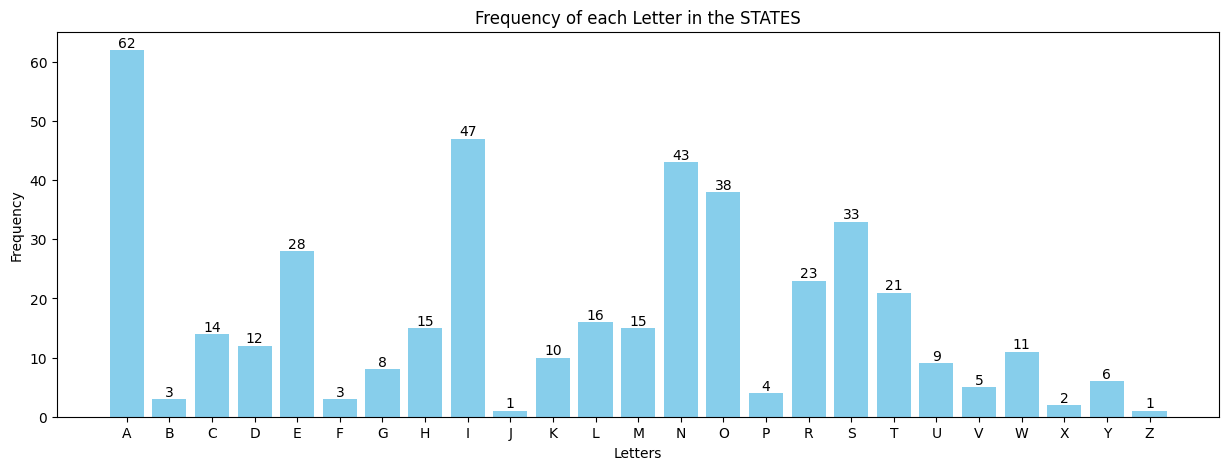

In [ ]:
letter_counts = collections.Counter(''.join(STATES))

# Sort the counts by letter
sorted_counts = dict(sorted(letter_counts.items()))

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Frequency of each Letter in the STATES')
bars = plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

# Probability of next letter

In [ ]:
def prob_following_letter(words):

  # Create a nested defaultdict to store the frequencies
  freq_dict = collections.defaultdict(lambda: collections.defaultdict(int))

  # Iterate over each word
  for word in words:
      # Iterate over each pair of adjacent characters
      for i in range(len(word) - 1):
          char1 = word[i]
          char2 = word[i + 1]
          freq_dict[char1][char2] += 1

  return freq_dict

In [ ]:
# Arbitrary preprocessing: since certain letters are very uncommon drop them (B, J, X, Z)
states_only_frequent_letters = [s.replace("B", "").replace("X", "").replace("J", "").replace("Z", "") for s in STATES]

In [ ]:
prob_following_letters = prob_following_letter(states_only_frequent_letters)

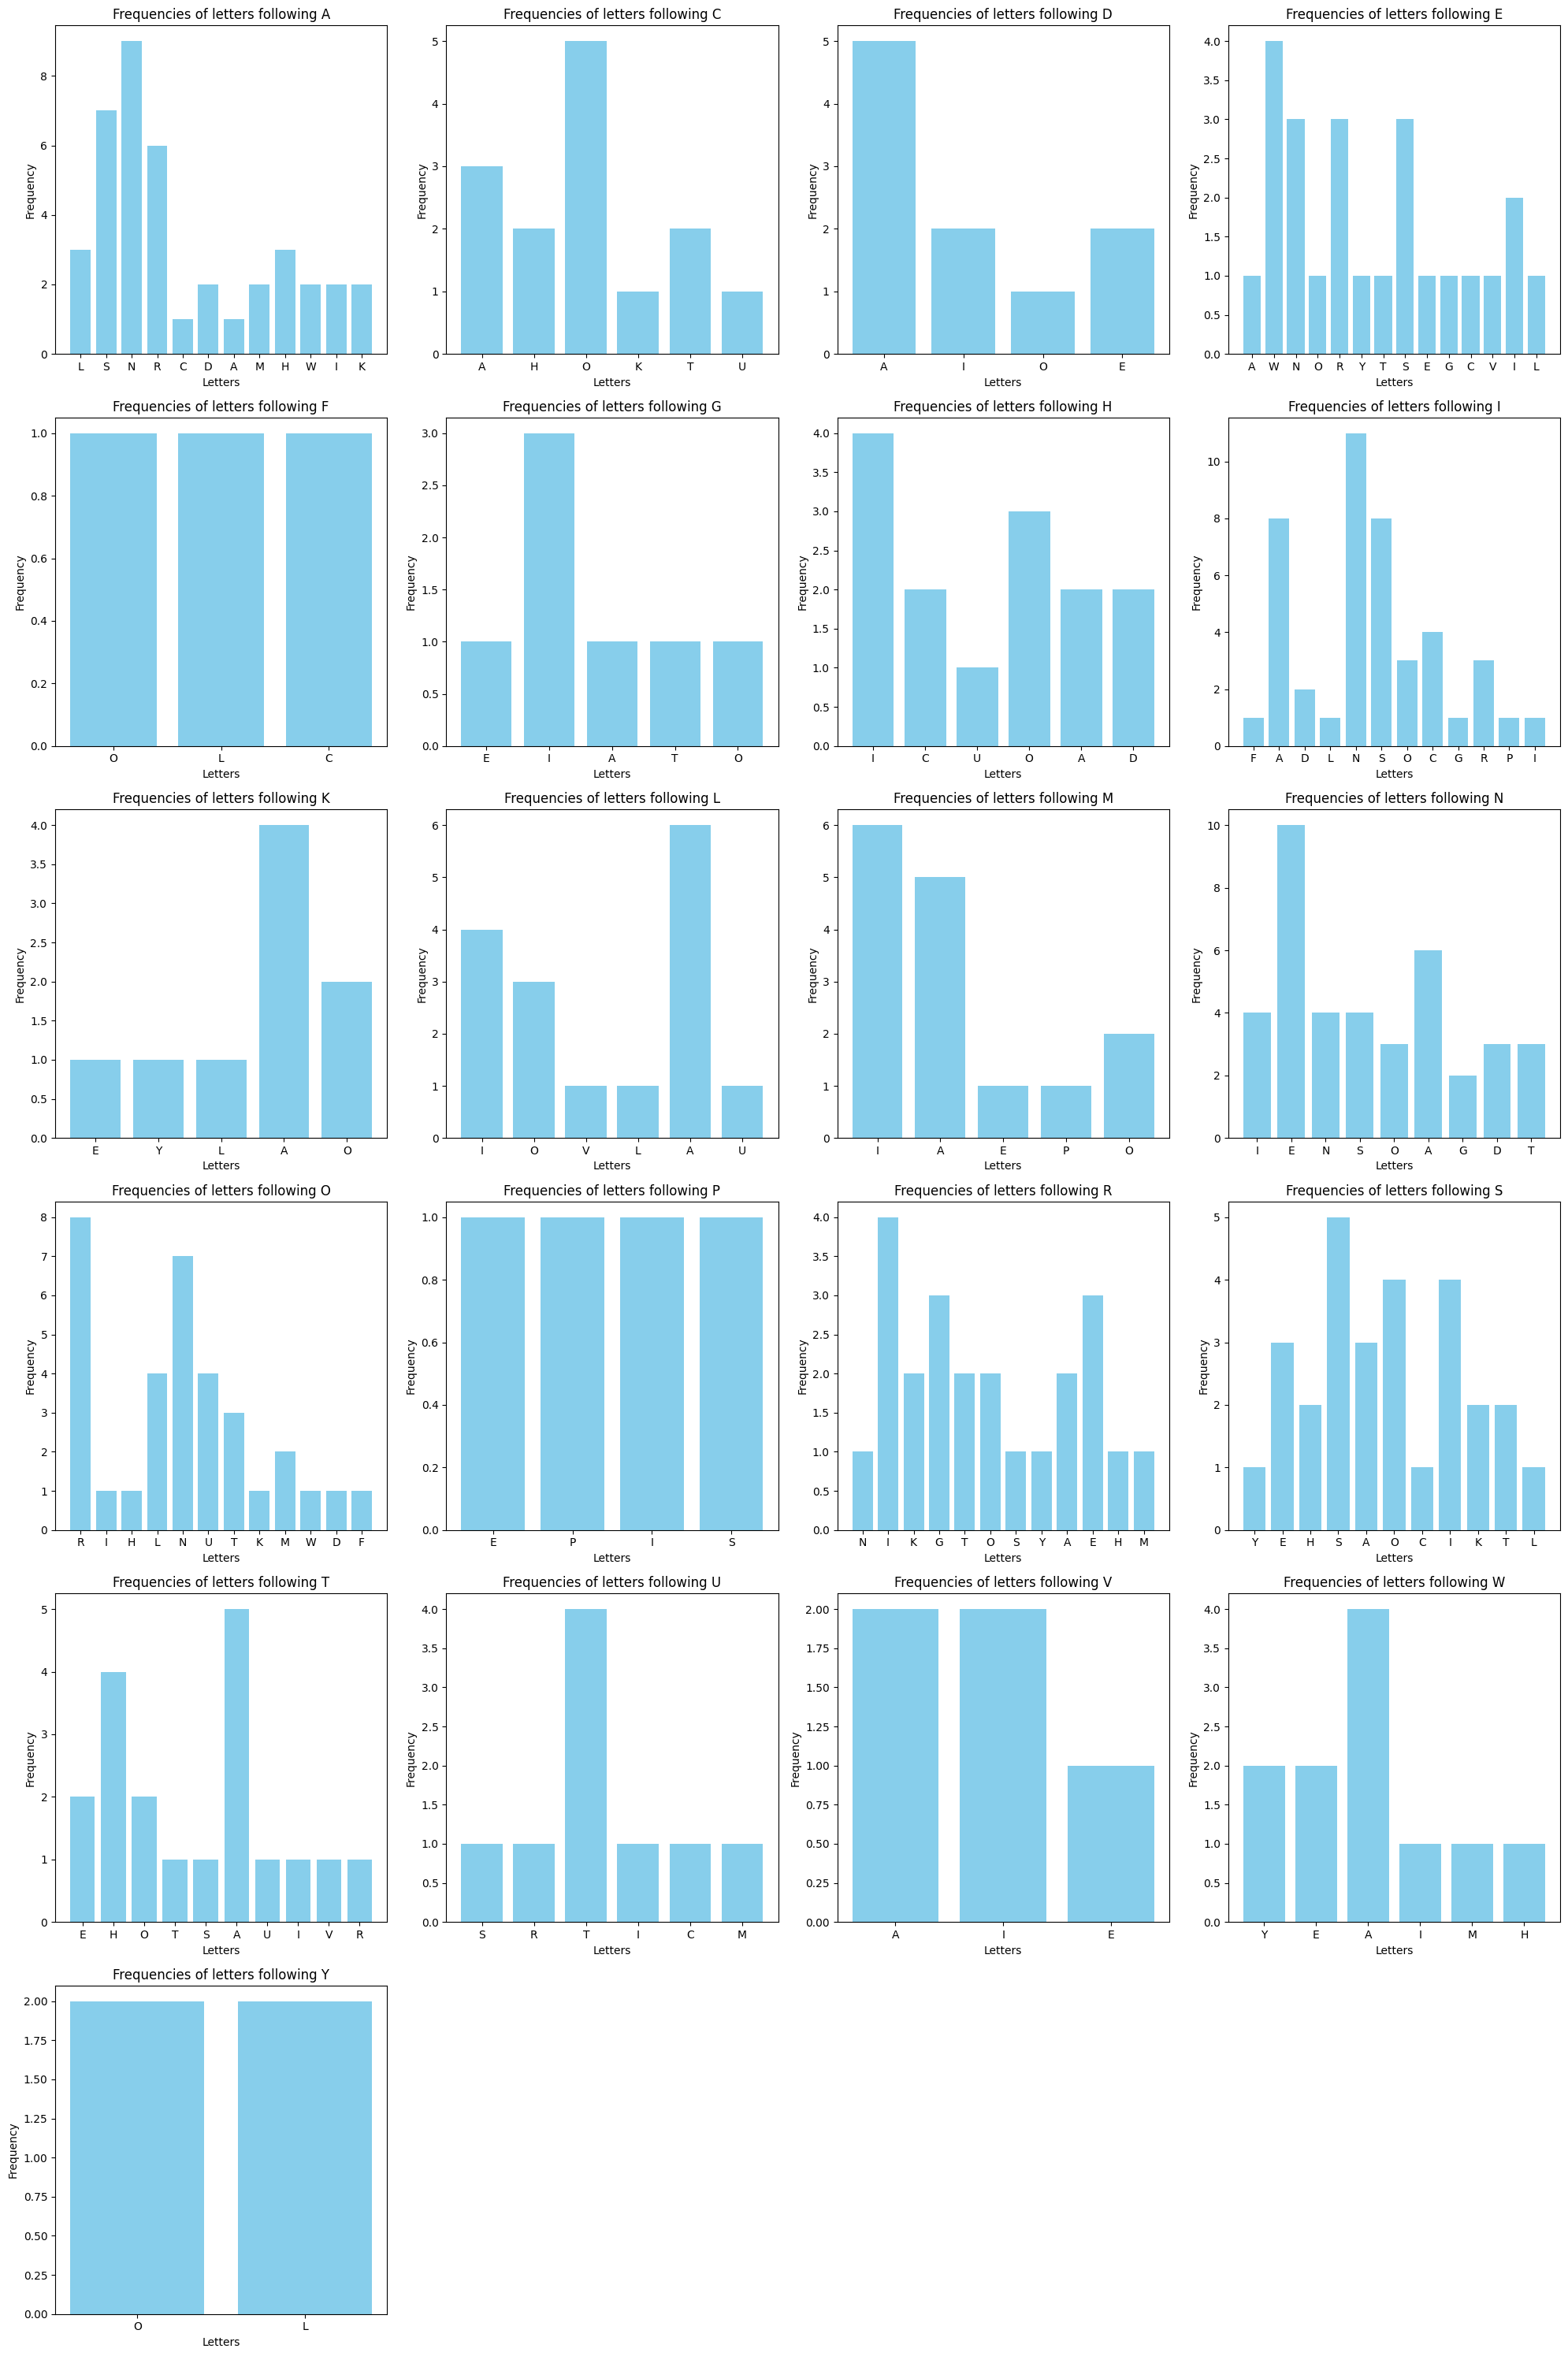

In [ ]:
# Number of plots per row
plots_per_row = 4

# Create subplots
num_keys = len(prob_following_letters)
rows = (num_keys + plots_per_row - 1) // plots_per_row
fig, axes = plt.subplots(rows, plots_per_row, figsize=(20, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each dictionary
for i, (key, subdict) in enumerate(sorted(prob_following_letters.items())):
    ax = axes[i]
    ax.bar(subdict.keys(), subdict.values(), color='skyblue')
    ax.set_title(f'Frequencies of letters following {key}')
    ax.set_xlabel('Letters')
    ax.set_ylabel('Frequency')
    #ax.set_ylim(0, 1)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create score function

In [ ]:
def kingsMoves(i, j):
    moves = []

    # Check all possible moves
    for row in range(max(0, i-1), min(GRID_SIZE, i+2)):
        for col in range(max(0, j-1), min(GRID_SIZE, j+2)):
            if row != i or col != j:
                moves.append((row, col))

    return moves

In [ ]:
# Cache possible moves in the board
cached_moves = {f'{i}{j}': kingsMoves(i, j) for i in range(GRID_SIZE) for j in range(GRID_SIZE)}

In [ ]:
def check_almost_subset(s1, s2):

    # Find the difference between the sets
    missing_elements = s2 - s1

    # Check if the number of missing elements is less than or equal to 1
    return len(missing_elements) <= 1

In [ ]:
def search_states(grid, i, j, index, possible_states, cached_moves=cached_moves):

  good_states = set()

  p_states = possible_states.copy()

  for state in list(p_states.keys()):

    if grid[i][j] != state[index]:
      p_states[state] += 1
      if p_states[state] == 2:
        del p_states[state]
        continue

    if index == len(state) - 1 and p_states[state] <= 1:
      good_states.add(state)
      return good_states

  if p_states:
    moves = cached_moves[f'{i}{j}']
    for move_i, move_j in moves:
       good_states.update(search_states(grid, move_i, move_j, index + 1, p_states))

  return good_states

In [ ]:
class Solution:
  def __init__(self, grid, population_score, good_states):
    self.grid = grid
    self.population_score = population_score
    self.good_states = good_states

  def __str__(self):
    return f'Score: {self.population_score}, states: {self.good_states}, grid: {self.grid}'

In [ ]:
def score(grid, population_dict, states_sets=STATES_SETS):

  flattened_grid = frozenset(''.join([item for inner_list in grid for item in inner_list]))
  possible_states = {state: 0 for state, state_set in states_sets.items() if check_almost_subset(flattened_grid, state_set)}

  # Search for good states and when you find them then removed them from the possible states
  good_states = set()
  for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
      new_good_states = search_states(grid, i, j, 0, possible_states)
      good_states.update(new_good_states)
      possible_states = {k: v for k, v in possible_states.items() if k not in new_good_states}

  population_score = sum([population_dict[state] for state in good_states])

  solution = Solution(grid, population_score, good_states)

  return solution

In [ ]:
# Example
grid = [['O', 'I', 'L', 'L', 'I'], ['S', 'A', 'F', 'O', 'M'], ['O', 'N', 'C', 'I', 'T'], ['M', 'A', 'I', 'E', 'A'], ['H', 'R', 'G', 'D', 'N']]

In [ ]:
print(score(grid, STATES_POPULATION))

Score: 186592308, states: {'ALABAMA', 'NEVADA', 'INDIANA', 'IDAHO', 'MAINE', 'ARIZONA', 'LOUISIANA', 'GEORGIA', 'VIRGINIA', 'ALASKA', 'TEXAS', 'FLORIDA', 'IOWA', 'ILLINOIS', 'HAWAII', 'ARKANSAS', 'MONTANA', 'OHIO', 'KANSAS', 'MICHIGAN', 'CALIFORNIA'}, grid: [['O', 'I', 'L', 'L', 'I'], ['S', 'A', 'F', 'O', 'M'], ['O', 'N', 'C', 'I', 'T'], ['M', 'A', 'I', 'E', 'A'], ['H', 'R', 'G', 'D', 'N']]


# Generate grids

In [ ]:
def get_combined_probabilities(letter_set, prob_dict):

    combined_probs = {}
    total_count = 0

    # Iterate over each letter in the input set
    for letter in letter_set:
        if letter in prob_dict:
            # Get the probabilities for the current letter
            letter_probs = prob_dict[letter]
            total_count += sum(letter_probs.values())

            # Update the combined probabilities
            for char, prob in letter_probs.items():
                combined_probs[char] = combined_probs.get(char, 0) + prob

    return combined_probs

In [ ]:
def sample_grid(prob_next_letter_states, cached_moves=cached_moves):

  coordinates = [(2,2), (3,2), (3,3), (2,3), (1,3), (1,2), (1,1), (2,1), (3,1), (0,2), (0,3), (0,4), (1,4), (2,4), (3,4), (4,4), (4,3), (4,2), (4,1), (4,0), (3,0), (2,0), (1,0), (0,0), (0,1)]

  grid = [[None for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
  for (i, j) in coordinates:

    near_positions = cached_moves[f'{i}{j}']
    near_letters = set()
    for near_position_i, near_position_j in near_positions:
      near_letter = grid[near_position_i][near_position_j]
      if near_letter:
        near_letters.add(near_letter)

    if near_letters:
      # If neighbouring letters available, sample a letter based on the combined probabilities
      combined_prob = get_combined_probabilities(near_letters, prob_next_letter_states)
      sampled_letter = random.choices(list(combined_prob.keys()), weights=list(combined_prob.values()), k=1)[0]
    else:
      sampled_letter = random.choices(list(prob_next_letter_states.keys()))[0]

    grid[i][j] = sampled_letter

  return grid

In [ ]:
# Example
grid = sample_grid(prob_following_letters)

In [ ]:
grid

[['N', 'N', 'L', 'A', 'R'],
 ['O', 'A', 'T', 'O', 'G'],
 ['D', 'I', 'L', 'N', 'R'],
 ['R', 'O', 'A', 'W', 'S'],
 ['R', 'S', 'S', 'N', 'S']]

In [ ]:
print(score(grid, STATES_POPULATION))

Score: 54145390, states: {'IOWA', 'OREGON', 'MONTANA', 'INDIANA', 'IDAHO', 'OHIO', 'KANSAS', 'ALASKA', 'FLORIDA'}, grid: [['N', 'N', 'L', 'A', 'R'], ['O', 'A', 'T', 'O', 'G'], ['D', 'I', 'L', 'N', 'R'], ['R', 'O', 'A', 'W', 'S'], ['R', 'S', 'S', 'N', 'S']]


# Upscale generation of grids

In [ ]:
%%time
solutions = []
for _ in range(500_000): # N of solutions to generate
  grid = sample_grid(prob_following_letters)
  solution = score(grid, STATES_POPULATION)
  if solution.population_score > 115_000_000: # Arbitrary threshold to define a good solution
    solutions.append(solution)

CPU times: user 1h 2min 56s, sys: 8.56 s, total: 1h 3min 5s
Wall time: 1h 3min 34s


In [ ]:
best_solution = max(solutions, key=lambda x: x.population_score)
print(best_solution)

Score: 142927250, states: {'IOWA', 'ILLINOIS', 'OREGON', 'MONTANA', 'NEVADA', 'INDIANA', 'MAINE', 'OHIO', 'LOUISIANA', 'KANSAS', 'ALASKA', 'CALIFORNIA', 'TEXAS', 'FLORIDA'}, grid: [['C', 'A', 'D', 'T', 'E'], ['E', 'W', 'E', 'N', 'A'], ['N', 'L', 'F', 'R', 'G'], ['A', 'I', 'O', 'R', 'M'], ['S', 'N', 'N', 'H', 'A']]


# Fine-tune best solution

In [ ]:
def fine_tune(original_solution):

  grid = original_solution.grid.copy()

  for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):

      # Get current score
      original_element = grid[i][j]
      current_solution = score(grid, STATES_POPULATION)
      current_score = current_solution.population_score

      # Replace with Q that does not show up in any state
      grid[i][j] = 'Q'
      new_solution = score(grid, STATES_POPULATION)
      new_score = new_solution.population_score

      # If missing a letter reduces the score, then put back original letter. Otherwise, try all letters in the alphabeth.
      if current_score > new_score:
        grid[i][j] = original_element
      else:
        for letter in LETTERS:
          grid[i][j] = letter
          new_solution = score(grid, STATES_POPULATION)
          new_score = new_solution.population_score
          if new_score > current_score:
            current_score = new_score
            break

  new_solution = score(grid, STATES_POPULATION)

  return new_solution

In [ ]:
def recursive_fine_tune(solution):

  while True:
    original_score = solution.population_score
    solution = fine_tune(solution)
    if solution.population_score == original_score:
      break

  return solution

In [ ]:
%%time
print(f'Solutions to fine-tune: {len(solutions)}')
fine_tuned_solutions = [recursive_fine_tune(solution) for solution in solutions]
fine_tuned_solutions = filter(lambda x: x.population_score > 165_379_868, fine_tuned_solutions)
fine_tuned_solutions = sorted(fine_tuned_solutions, key=lambda x: x.population_score, reverse=True)

Solutions to fine-tune: 98
CPU times: user 3min 22s, sys: 450 ms, total: 3min 22s
Wall time: 3min 23s


In [ ]:
def awards(solution):
  if solution.population_score < 165_379_868:
    return
  print('Awards:')
  if solution.population_score > 200_000_000:
    print('200M')
  if len(solution.good_states) >= 20:
    print('20S')
  if all([c in solution.good_states for c in ['COLORADO', 'UTAH', 'NEWMEXICO', 'ARIZONA']]):
    print('4C')
  if 'PENNSYLVANIA' in solution.good_states:
    print('PA')
  if 'CALIFORNIA' not in solution.good_states:
    print('NOCAL')
  if all([c in solution.good_states for c in ['MONTANA', 'MAINE', 'MARYLAND', 'MICHIGAN', 'MASSACHUSETTS', 'MISSOURI', 'MISSISSIPPI', 'MINNESOTA']]):
    print('M8')

In [ ]:
for solution in fine_tuned_solutions:
  print(solution)
  awards(solution)
  print('--------------------------')

Score: 196965335, states: {'ALABAMA', 'NORTHCAROLINA', 'NEVADA', 'INDIANA', 'IDAHO', 'MAINE', 'ARIZONA', 'LOUISIANA', 'GEORGIA', 'ALASKA', 'VIRGINIA', 'TEXAS', 'FLORIDA', 'IOWA', 'ILLINOIS', 'HAWAII', 'ARKANSAS', 'OREGON', 'MONTANA', 'OHIO', 'KANSAS', 'COLORADO', 'CALIFORNIA'}, grid: [['A', 'H', 'T', 'E', 'A'], ['B', 'C', 'D', 'I', 'N'], ['L', 'A', 'I', 'O', 'I'], ['S', 'I', 'R', 'G', 'L'], ['A', 'N', 'O', 'M', 'Z']]
Awards:
20S
--------------------------
Score: 186060624, states: {'ALABAMA', 'NEVADA', 'INDIANA', 'IDAHO', 'MAINE', 'ARIZONA', 'LOUISIANA', 'GEORGIA', 'ALASKA', 'VIRGINIA', 'TEXAS', 'FLORIDA', 'IOWA', 'ILLINOIS', 'ARKANSAS', 'OREGON', 'DELAWARE', 'MONTANA', 'OHIO', 'KANSAS', 'COLORADO', 'CALIFORNIA'}, grid: [['L', 'A', 'C', 'L', 'Z'], ['E', 'I', 'N', 'O', 'A'], ['D', 'A', 'R', 'I', 'S'], ['M', 'K', 'G', 'E', 'A'], ['Z', 'Z', 'O', 'N', 'T']]
Awards:
20S
--------------------------
Score: 184452790, states: {'ALABAMA', 'NEVADA', 'INDIANA', 'IDAHO', 'MAINE', 'ARIZONA', 'LOUISI